In [1]:
#Initial imports
!pip install pandas
!pip install pathlib
!pip install requests
!pip install alpaca-trade-api 
%matplotlib inline


In [2]:

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
#load .env environment variables
load_dotenv()

True

In [4]:
#PERSONAL FINANCE PLANNER
# set current amount of crypto assets
# Your COD HERE!
my_btc = 1.2
my_eth = 5.3

In [5]:
#Crypto API URL's
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [29]:
#Fetch current BTC price
#YOUR CODE HERE!
response =requests.get(btc_url).json()
BTC_price = response["data"]["1"]["quotes"]["CAD"]["price"]
#compute current value of my crypto
my_btc_value = BTC_price * my_btc




In [30]:
#Fetch current ETH price
response =requests.get(eth_url).json()
ETH_price = response["data"]["1027"]["quotes"]["CAD"]["price"]
#compute current value of my crypto
my_eth_value = ETH_price * my_eth


    

In [31]:
#print current crypto wallet balance
print(f"The current value of your BTC is ${my_btc_value:0.2f}")
print(f"The current value of your ETH is ${my_eth_value:0.2f}")

The current value of your BTC is $73893.67
The current value of your ETH is $27422.89


In [32]:
#COLLECT INVESTMENTS DATA USING ALPACA:SPY(STOCKC) AND AGG (BONDS)
# Set current amount of shares
my_agg = 200
my_spy = 50

In [33]:
# Set Alpaca API key and secret key
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY") 

In [34]:
#Create Alpaca API object
  
api = tradeapi.REST( alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [35]:
# Format current date as ISO format

today =  pd.Timestamp("2017-12-13", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=today,
    limit = 1000
).df

# Preview DataFrame
df_ticker.tail()

AGG                                         SPY  \
                             open     high     low   close     volume    open   
time                                                                            
2021-12-10 00:00:00-05:00  114.37  114.510  114.22  114.24  6263328.0  469.23   
2021-12-13 00:00:00-05:00  114.51  114.705  114.46  114.60  4006984.0  470.19   
2021-12-14 00:00:00-05:00  114.46  114.540  114.26  114.41  6247899.0  463.05   
2021-12-15 00:00:00-05:00  114.23  114.445  114.11  114.30  7232824.0  463.42   
2021-12-16 00:00:00-05:00  114.26  114.480  114.26  114.41  3605426.0  472.57   

                                                               
                             high     low   close      volume  
time                                                           
2021-12-10 00:00:00-05:00  470.90  466.51  470.72  64958435.0  
2021-12-13 00:00:00-05:00  470.56  466.27  466.61  53533452.0  
2021-12-14 00:00:00-05:00  465.74  460.25  463.39  84376354.0  
2021-12-15 00:00:00-05:00  470.86  460.74  470.58  97945190.0  
2021-12-16 00:00:00-05:00  472.87  468.63  468.79  43549093.0

In [21]:
df_ticker.index.shape

(1001,)

In [22]:
# Pick AGG and SPY close prices
agg_close_price = df_ticker["AGG"]["close"][999] 
spy_close_price = df_ticker["SPY"]["close"][999]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.3
Current SPY closing price: $470.58


In [23]:
# Compute the current value of shares
my_spy_value= spy_close_price * my_spy
my_agg_value= agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $23529.00
The current value of your 200 AGG shares is $22860.00


In [36]:
#SAVINGS HEALTH ANALYSIS
# Set monthly household income
monthly_household_income = 12000

# Consolidate financial assets data
Cryptocurrency = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value

# Create savings DataFrame
df_savings = Cryptocurrency + shares

# Display savings DataFrame
print(df_savings)

147705.55765


In [37]:
#Consolidated Financial Data
shares = my_spy_value + my_agg_value
Cryptocurrency = BTC_price + ETH_price
print (Cryptocurrency)
print (shares)

66752.1855
46389.0


In [38]:
#Savings Dataframe
# assign data of lists.  
data = {"amount":[65108, 35150]}  
  
# Create DataFrame  
df_savings = pd.DataFrame(data, index=["Cryptocurrency", "shares"])  
  
# Print the output.  
display(df_savings)  

,amount
Cryptocurrency,65108
shares,35150


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

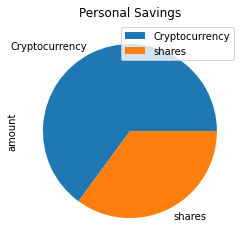

In [39]:
#Plot savings pie chart
df_savings.plot.pie(y="amount", title="Personal Savings")

In [40]:
# Set ideal emergency fund
emergency_fund = monthly_household_income * 3
emergency_fund





36000

In [41]:
#Total Savings
Total_savings = Cryptocurrency + shares
Total_savings

113141.1855

In [42]:
#Validate emergency fund
a = emergency_fund
a = 36000

if a > 35999:
  print("Emergency fund is secure")

Emergency fund is secure


In [43]:


#2-MONTE CARLO SIMULATION-RETIREMENT PLANNING
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [44]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = api.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df


# Display sample data
df_stock_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                              SPY                                      
                             open    high     low    close     volume  
time                                                                   
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594

In [45]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6,.4],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [46]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

AGG                                       \
                             open     high       low    close   volume   
time                                                                     
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                   
                              volume daily_return  
time                                               
2017-05-11 00:00:00-04:00   45435690          NaN  
2017-05-12 00:00:00-04:00   35283567    -0.001587  
2017-05-15 00:00:00-04:00   42230620     0.005083  
2017-05-16 00:00:00-04:00   37206183    -0.000604  
2017-05-17 00:00:00-04:00  118613594    -0.017701

In [47]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()





Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/khalidromain/Api_homework/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002182,0.992975,0.998588,0.994049,0.998083,0.994359,1.003774,1.006105,0.997889,0.986853,...,1.003199,1.006461,0.999519,1.003852,1.000664,0.997042,1.007760,1.015447,1.000582,1.005767
2,0.999289,0.999178,1.005394,0.999055,0.999544,0.989884,1.003019,1.002509,1.006349,0.986999,...,0.999264,1.007464,1.004591,1.005502,1.009217,1.001717,1.010580,1.005270,1.005716,0.999767
3,0.994903,0.998544,1.002387,1.004470,1.006177,0.990376,1.008330,1.003213,1.006246,0.990494,...,1.002924,1.005624,1.002440,0.994664,0.998019,0.991711,1.004016,1.000930,1.014854,0.998412
4,0.991968,1.004071,1.007778,1.004633,1.009232,0.991620,1.009771,0.996826,1.010907,0.994616,...,0.996368,1.011974,1.001587,0.997687,1.004657,0.994146,1.015876,1.002039,1.011494,1.002301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.351811,5.396287,6.517358,5.913826,13.443105,13.758605,10.725266,8.867524,18.635225,7.204238,...,8.513479,10.023776,5.772154,8.224620,5.453460,3.930539,11.992395,9.167207,14.735340,9.448900
7557,6.329743,5.379326,6.537208,5.914401,13.543796,13.805055,10.824405,8.924037,18.578400,7.181721,...,8.475213,9.970850,5.803692,8.223490,5.459143,3.937900,11.967997,9.193505,14.764747,9.428346
7558,6.303915,5.491903,6.564972,5.929805,13.453393,13.835220,10.856353,8.871827,18.612240,7.204129,...,8.461836,9.950606,5.820452,8.168972,5.479102,3.925271,11.978814,9.153789,14.860757,9.476010
7559,6.309573,5.523564,6.578505,5.879900,13.543723,13.860116,10.865159,8.842395,18.607348,7.245969,...,8.530344,9.954168,5.758009,8.186368,5.499564,3.920869,12.050358,9.114955,15.011107,9.492918


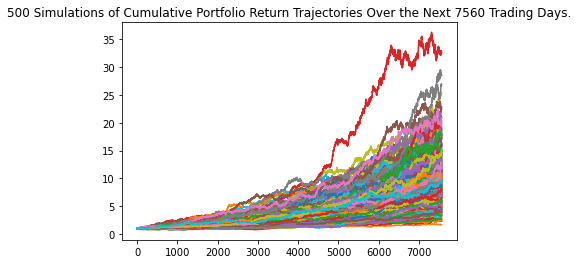

In [48]:







# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

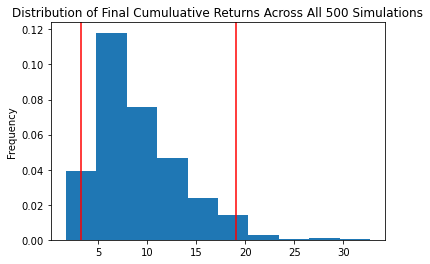

In [49]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [50]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              9.126416
std               4.401120
min               1.726126
25%               5.951586
50%               8.064631
75%              11.546578
max              32.714575
95% CI Lower      3.318238
95% CI Upper     19.013094
Name: 7560, dtype: float64


In [51]:
 #Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $66364.75 and $380261.89


In [52]:
# Set initial investment
initial_investment1 = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)



# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $99547.13 and $570392.83
